# `Data Description`

The dataset consists of customer information for a customer churn prediction problem. It includes the following columns:

**RowNumber:** Row index for reference.

**CustomerId:** Unique identifier for each customer.

**Surname:** Last name of the customer.

**CreditScore:** Credit score of the customer.

**Geography:** Country where the customer is based (e.g., France, Spain, Germany).

**Gender:** Gender of the customer (Male or Female).

**Age:** Age of the customer.

**Tenure:** Number of years the customer has been with the bank.

**Balance:** Account balance of the customer.

**NumOfProducts:** Number of bank products the customer has subscribed to.

**HasCrCard:** A binary indicator (1 or 0) representing whether the customer has a credit card.

**IsActiveMember:** A binary indicator (1 or 0) representing whether the customer is an active member.

**EstimatedSalary:** Estimated salary of the customer.

**Exited:** A binary indicator (1 or 0) representing whether the customer has churned (1) or not (0).

In [1]:
# importing required libraries

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# `Exploratory Data Analysis (EDA)`

In [4]:
df.sample(8)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6741,6742,15730810,Storey,613,Spain,Male,44,9,100524.69,1,1,1,47298.95,0
9863,9864,15726179,Ferrari,757,Germany,Female,43,5,131433.33,2,1,1,3497.43,1
5231,5232,15749519,Lin,822,France,Male,38,6,128289.70,3,1,0,9149.96,1
2478,2479,15652808,Monaldo,774,France,Female,41,5,126670.37,1,1,0,102426.06,0
7918,7919,15572706,Smith,589,France,Male,37,5,0.00,1,1,0,61324.87,0
2088,2089,15615020,Nnaife,595,Germany,Female,41,9,150463.11,2,0,1,81548.38,0
7351,7352,15568878,Cheng,654,Spain,Male,34,5,0.00,2,1,0,159311.46,0
2805,2806,15618936,MacDonald,688,France,Female,51,5,0.00,1,1,0,91624.11,1


In [5]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**All variables has correct data type.**

In [8]:
df.isna().sum()/len(df)*100

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


**There is no null value in any of variable.**

In [9]:
df.duplicated().sum()

np.int64(0)

**There is no duplicate record in datset.**

In [10]:
# Statistical summary of numerical variables

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### `CreditScore`
* **The average credit score of customers is approximately 650.53.**

* **Credit scores range from a minimum of 350 to a maximum of 850.**

* **Most customers have credit scores between 584 and 718.**

* **The standard deviation is about 96.65, indicating a significant range in credit scores.**

### `Age`
* **The average age of the customers is about 38.92 years.**

* **The youngest customer is 18 years old, while the oldest is 92 years old.**

* **Most customers fall within the age range of 32 to 44 years.**

* **The standard deviation of age is approximately 10.49 years.**

### `Tenure`
* **Customers have an average tenure of around 5 years.**

* **The tenure varies between 0 and 10 years.**

* **The majority of customers have a tenure between 3 and 7 years.**

* **The standard deviation is about 2.89 years, showing a moderate spread in tenure.**

### `Balance`
* **The average account balance of customers is approximately $76,485.89.**

* **Balances range from $0 (minimum) to $250,898.09 (maximum).**

* **Most customers have balances between $0 and $127,644.24.**

* **The standard deviation is about $62,397.41, indicating a wide variation in account balances.**

### `NumOfProducts`
* **Customers hold an average of about 1.53 products.**

* **The number of products ranges from 1 to 4.**

* **Most customers have either 1 or 2 products.**

* **The standard deviation is approximately 0.58, indicating a moderate spread.**

### `HasCrCard`
* **About 70.55% of customers have a credit card (HasCrCard = 1).**

* **Approximately 29.45% of customers do not have a credit card.**

### `IsActiveMember`
* **Around 51.51% of customers are active members.**

* **The rest (48.49%) are inactive members.**

### `EstimatedSalary`
* **The average estimated salary of customers is about $100,090.24.**

* **Salaries range from $11.58 (minimum) to $199,992.48 (maximum).**

* **Most customers earn between $51,002.11 and $149,388.25.**

* **The standard deviation is about $57,510.49, showing a significant variation in salaries.**

### `Exited`
* **Approximately 20.37% of customers have churned (Exited = 1).**

* **This means that around 79.63% of customers are retained.**

* **Churn values are binary (0 or 1), indicating whether a customer has churned or not.**

In [11]:
# Statistical summary of categoical variables

df.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [12]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [13]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [14]:
df.corr(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


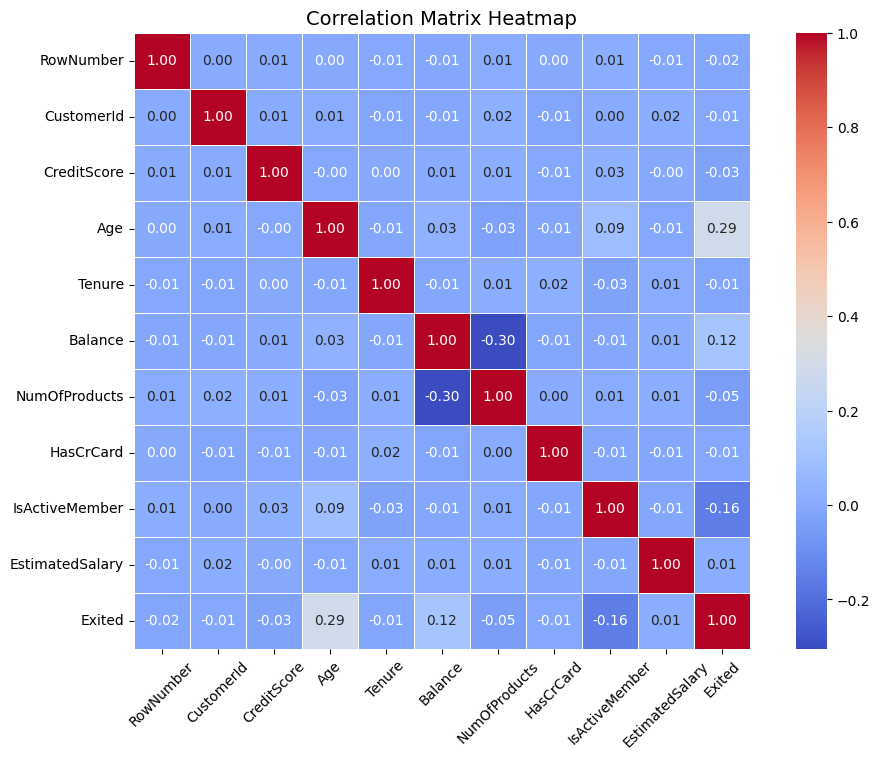

In [15]:
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [16]:
df.drop(columns=['CustomerId', 'Surname'],axis=1,inplace=True)

In [17]:
df.columns

Index(['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
# Check for typo's & suspicious values and rechecking dataset

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()

missing_values = df.isnull().sum()
data_types = df.dtypes

print('-'*50)
print("Missing values:")
print(missing_values)
print()

x = df.duplicated().sum()
print('-'*50)
print("Duplicate values:", x)
print()


y = df.shape
print('-'*50)
print("Shape of Dataset:", y)
print()

z = df.columns
print('-'*50)
print("Columns of Datset:", z)
print()

print('-'*50)
print("\nData types:")
print(data_types)
print()

Unique values in 'RowNumber': [    1     2     3 ...  9998  9999 10000]

Unique values in 'CreditScore': [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 84

**The dataset has been cleaned and no suspicious values or typos have been found.**

# `Outliers Treatment`

It is important to find and remove unusual or extreme data points, also known as outliers. Outliers can affect the model's understanding of the data and lead to wrong predictions. By identifying and removing outliers, the model becomes more accurate and reliable, and can better capture the actual patterns in the data.

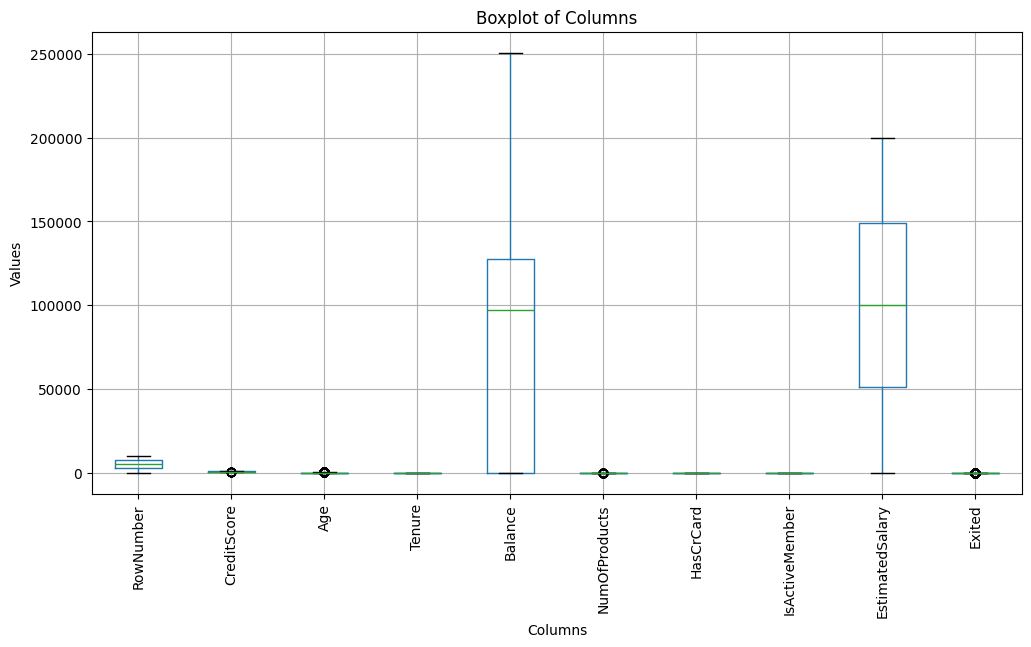

In [19]:
# Adjust figure size based on the number of columns
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [20]:
# Make a copy of cleaned data

df_cleaned = df.copy()

# `Feature Encoding`

Feature encoding techniques converts categorical data (like labels) into numbers that algorithms understand. This is essential because algorithms work with numbers, ensuring valuable info from categories isn't lost.

In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Geography', 'Gender'], dtype='object')

**There are two variables, which needs to be encode.**

In [22]:
df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first = True)

In [23]:
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Gender_Male        10000 non-null  bool   
 11  Geography_Germany  10000 non-null  bool   
 12  Geography_Spain    10000 non-null  bool   
dtypes: bool(3), float64(2), int64(8)
memory usage: 810.7 KB


**Data types of all variables is fine.**

# `Checking Distribution of data`

* In machine learning, it is important to check how the data is spread across different values. This is called the distribution of data.


* If the data is skewed, meaning that there are more data points in one area than others, it can affect the performance of our models. For example, if the data is skewed towards the majority class, the model might perform well on the majority class but poorly on the minority class.


* By understanding the data distribution, we can choose appropriate strategies to handle imbalances, outliers, or other issues. This will ensure that our model works well across all scenarios and accurately represents the underlying patterns in the data.

In [25]:
df.shape

(10000, 13)

In [26]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 100000
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 17


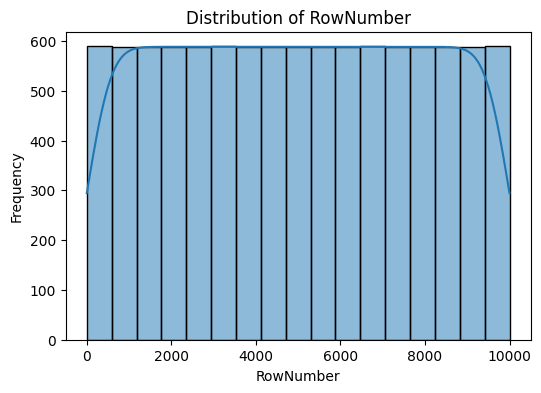

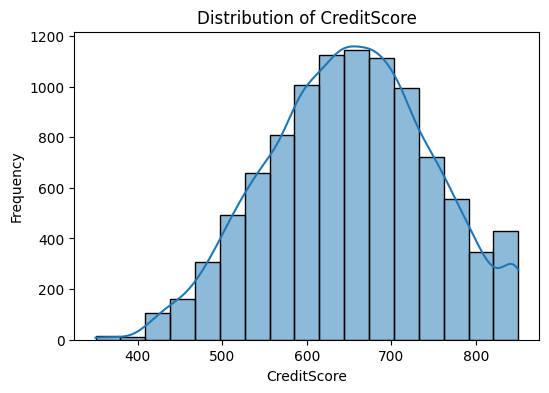

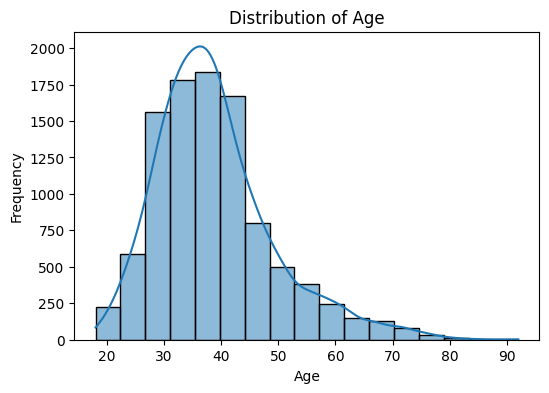

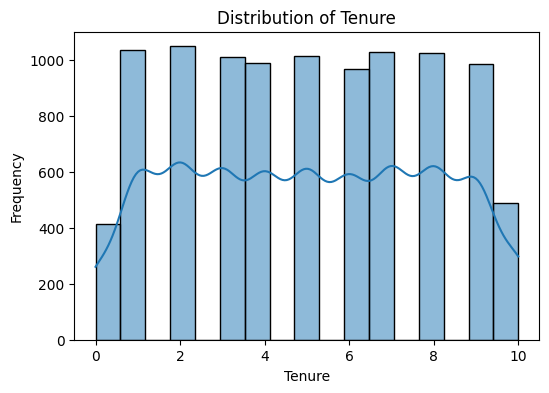

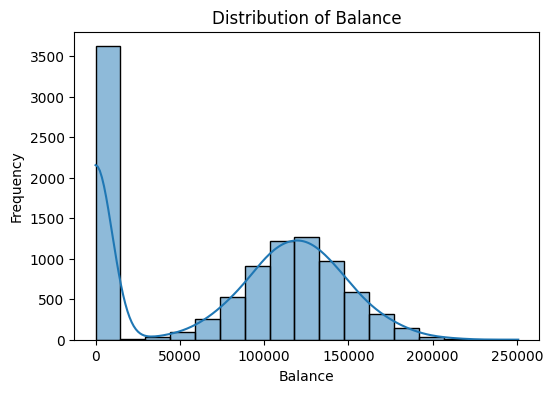

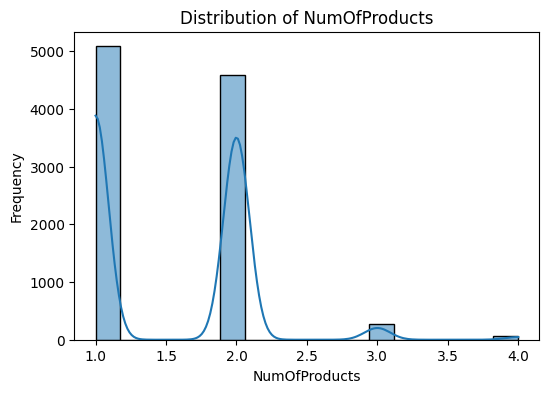

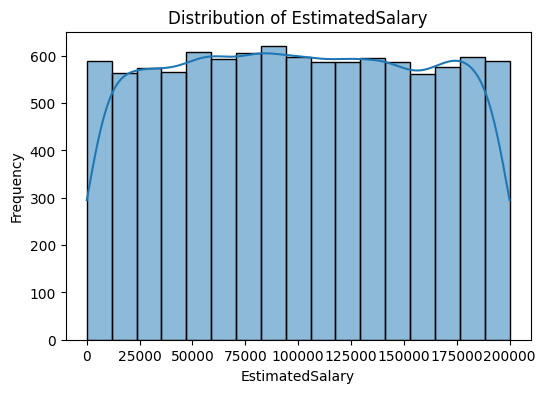

In [27]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=17, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [28]:
# check skewness of all continuous variables
df[continuous_vars].skew()

,0
RowNumber,0.000000
CreditScore,-0.071607
Age,1.011320
Tenure,0.010991
Balance,-0.141109
NumOfProducts,0.745568
EstimatedSalary,0.002085


# `Check colinearity between variables`

* In machine learning, it is important to check if there are variables that are highly correlated with each other. If there are, then we should remove one of them to improve the stability and interpretability of the model.


* Highly correlated variables are redundant, meaning that they provide the same information. This can cause the model to give too much importance to one variable, leading to overfitting. Overfitting is when the model learns the training data too well and does not generalize well to new data.


* By removing highly correlated variables, we can make the model focus on distinct and meaningful information. This makes the model more reliable and understandable. It also helps to prevent multicollinearity, which is a problem that can distort the model's predictions and insights.

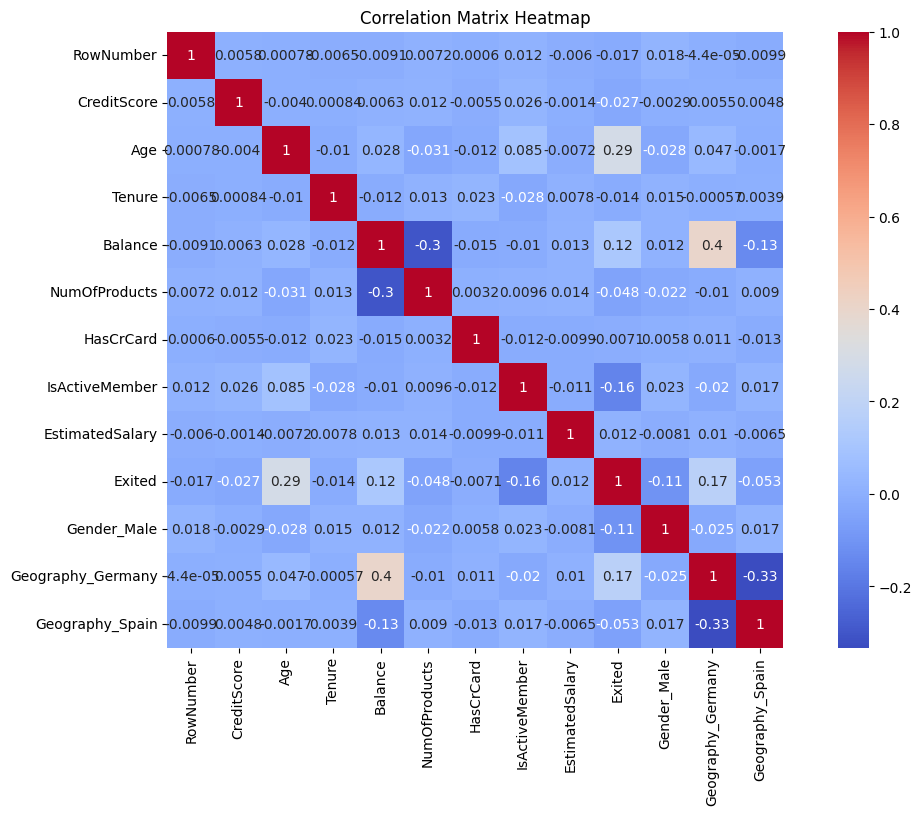

In [29]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(14,8)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# `Diving data into train and test set`

In [30]:
x = df.drop("Exited",axis=1)
y = df['Exited']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Take 70% data for training and 30% for testing.**

In [32]:
X_train.shape, y_train.shape

((7000, 12), (7000,))

In [33]:
X_test.shape, y_test.shape

((3000, 12), (3000,))

# `Feature Scaling`

* In machine learning, it is important to make sure that all features are on the same scale. This is called feature scaling.


* Feature scaling is important because it ensures that no single feature dominates the learning process. This is because many machine learning algorithms use distance-based calculations, and if features are on different scales, those with larger values could disproportionately influence the results.


* Feature scaling also helps to improve the convergence of gradient-based optimization algorithms, which can lead to faster training.


* By scaling features, we create a balanced playing field for each feature. This allows the algorithm to make fair and accurate comparisons, which can lead to better model performance.

In [34]:
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [35]:
columns_to_check = df.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (df[column] > 1).any() or (df[column] < 0).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than 1 or less than 0:")
print(columns_needs_to_be_scaled)

Columns with values greater than 1 or less than 0:
['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


In [37]:
from sklearn.preprocessing import MinMaxScaler  # Import the scaler

columns_to_scale = ['Age', 'Tenure', 'CreditScore', 'Balance', 'EstimatedSalary']
print("Columns in X_train:", X_train.columns)

# Apply MinMaxScaler before converting to NumPy array
scaler = MinMaxScaler()

# Convert DataFrame to avoid modifying slices
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train_scaled[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test_scaled[columns_to_scale])

Columns in X_train: Index(['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [38]:
X_train.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
9069,9070,619,32,4,175406.13,2,1,1,172792.43,False,False,True
2603,2604,643,34,7,160426.07,1,0,1,188533.11,False,True,False
7738,7739,561,33,6,0.00,2,0,0,173680.39,True,False,False
1579,1580,618,41,8,37702.79,1,1,1,195775.48,True,True,False
5058,5059,714,37,9,148466.93,2,0,1,151280.96,True,False,False


In [39]:
X_test.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
6252,6253,596,32,3,96709.07,2,0,0,41788.37,True,True,False
4684,4685,623,43,1,0.00,2,1,1,146379.30,True,False,False
1731,1732,601,44,4,0.00,2,1,0,58561.31,False,False,True
4742,4743,506,59,8,119152.10,2,1,1,170679.74,True,True,False
4521,4522,560,27,7,124995.98,1,1,1,114669.79,False,False,True


# `Check for the class imbalance`

* In machine learning, it is important to check if the data is balanced or not. This is called class imbalance.


* Class imbalance happens when there are more data points in one class than in the other class. This can affect the performance of the model. For example, if the majority class has more data points than the minority class, the model might perform well on the majority class but poorly on the minority class.


* By identifying class imbalance, we can employ strategies to address the issue. These strategies include resampling, adjusting class weights, or using different evaluation metrics. This will help us create a fair and accurate model that performs well across all classes


In [40]:
class_counts = df['Exited'].value_counts()
class_counts

,count
Exited,
0,7963
1,2037


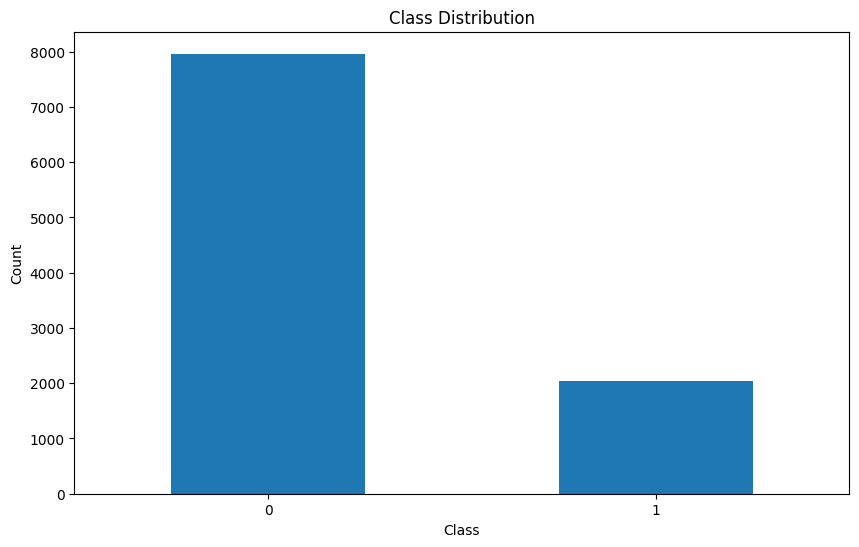

In [41]:
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# `Feature Selection using Random Forest Feature Importance Method`

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,Age,0.221080
1,NumOfProducts,0.126334
2,Balance,0.120910
3,EstimatedSalary,0.119164
4,RowNumber,0.117626
5,CreditScore,0.115757
6,Tenure,0.067765
7,IsActiveMember,0.039645
8,Geography_Germany,0.025590
9,Gender_Male,0.017060


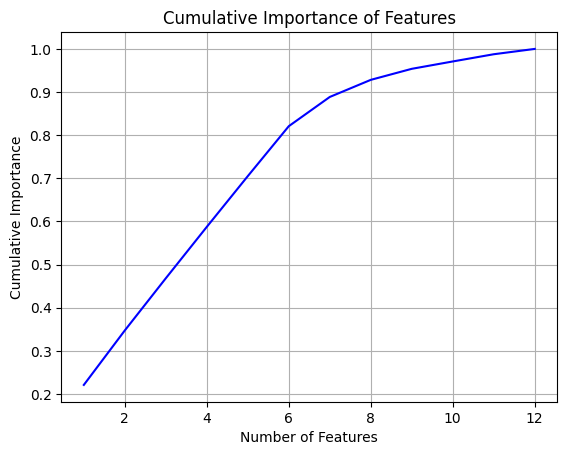

In [43]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

# `Check multi-colinearity between variables`

* In machine learning, it is important to check if there are variables that are highly correlated with each other. This is called multicollinearity.


* Multicollinearity can cause problems with the model, such as making it unstable and difficult to interpret. This is because correlated variables are redundant, meaning that they provide the same information. This can cause the model to give too much importance to one variable, leading to overfitting.


* By identifying and addressing multicollinearity, we can make the model more reliable and interpretable. This improves the model's predictive power and makes it easier to understand how the variables affect the target variable.

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure only numeric columns are used
X_train_numeric = X_train.select_dtypes(include=[int, float])

# Compute VIF
vif = pd.DataFrame()
vif["Variable"] = X_train_numeric.columns
vif["VIF"] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

# Sort by VIF value
vif = vif.sort_values(by="VIF", ascending=False)

# Display VIF values
print(vif)

          Variable        VIF
1      CreditScore  21.739070
2              Age  12.270697
5    NumOfProducts   7.759255
8  EstimatedSalary   3.924013
0        RowNumber   3.894290
3           Tenure   3.848823
6        HasCrCard   3.288978
4          Balance   2.623676
7   IsActiveMember   2.071780


# `Model Building: Machine Learning Algorithms`

In [45]:
#importing algorithms, metrics and time

import time

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [46]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.785571,0.719540,0.785571,0.722096,2.284145
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.087040
2,KNeighborsClassifier,0.812857,0.788277,0.812857,0.773629,0.618314
3,GaussianNB,0.781286,0.712443,0.781286,0.721164,0.019717
4,AdaBoostClassifier,0.850000,0.838579,0.850000,0.835835,0.466571
5,GradientBoostingClassifier,0.871429,0.865673,0.871429,0.859287,1.902004
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.145669
7,XGBClassifier,0.972714,0.973054,0.972714,0.972142,0.301927
8,SVC,0.792429,0.627943,0.792429,0.700662,3.360555


In [47]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.803000,0.749073,0.803000,0.746061
1,DecisionTreeClassifier,0.797667,0.802584,0.797667,0.799992
2,KNeighborsClassifier,0.764667,0.693034,0.764667,0.719254
3,GaussianNB,0.793000,0.723222,0.793000,0.735418
4,AdaBoostClassifier,0.860667,0.849627,0.860667,0.847222
5,GradientBoostingClassifier,0.873333,0.865770,0.873333,0.860969
6,RandomForestClassifier,0.875333,0.869232,0.875333,0.861869
7,XGBClassifier,0.863333,0.853405,0.863333,0.854414
8,SVC,0.805333,0.648562,0.805333,0.718495


In [48]:
selected_features = ['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']
available_features = X_train.columns

# Print missing columns, if any
missing = [col for col in selected_features if col not in available_features]
if missing:
    print(f"⚠️ Warning: These columns are missing in X_train: {missing}")

# Select only the available features to avoid errors
X_train = X_train[available_features.intersection(selected_features)]
X_test = X_test[available_features.intersection(selected_features)]

print("✅ Feature selection successful!")

⚠️ Warning: These columns are missing in X_train: ['Monthly_Bill', 'Total_Usage_GB', 'Subscription_Length_Months']
✅ Feature selection successful!


In [49]:
print('X_train columns:', X_train.columns)
print('-'*120)
print('X_test columns:', X_test.columns)

X_train columns: Index(['Age'], dtype='object')
------------------------------------------------------------------------------------------------------------------------
X_test columns: Index(['Age'], dtype='object')


In [50]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.771857,0.670402,0.771857,0.701798,2.201377
1,DecisionTreeClassifier,0.805286,0.775473,0.805286,0.774795,0.047695
2,KNeighborsClassifier,0.763714,0.744737,0.763714,0.752572,0.625433
3,GaussianNB,0.770000,0.682791,0.770000,0.707266,0.025691
4,AdaBoostClassifier,0.792429,0.627943,0.792429,0.700662,0.482985
5,GradientBoostingClassifier,0.805143,0.774792,0.805143,0.773204,1.079144
6,RandomForestClassifier,0.805286,0.775709,0.805286,0.775465,0.719928
7,XGBClassifier,0.805143,0.775232,0.805143,0.774574,0.552883
8,SVC,0.802571,0.770312,0.802571,0.769146,6.920565


In [51]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.782333,0.687666,0.782333,0.718940
1,DecisionTreeClassifier,0.809667,0.778246,0.809667,0.782727
2,KNeighborsClassifier,0.766667,0.752247,0.766667,0.758682
3,GaussianNB,0.779667,0.694940,0.779667,0.722053
4,AdaBoostClassifier,0.805333,0.648562,0.805333,0.718495
5,GradientBoostingClassifier,0.811333,0.779511,0.811333,0.782672
6,RandomForestClassifier,0.809000,0.777801,0.809000,0.782737
7,XGBClassifier,0.810667,0.779463,0.810667,0.783482
8,SVC,0.816667,0.786953,0.816667,0.787237


# `Model Building: Neural Network`

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import recall_score

## `Defining Callbacks for Early Stopping and Model Checkpoint`

* Best model will save to pwd (present working directory) as 'Churn Classifier.h5'


* Early stopping is a regularization technique that stops the training of a neural network before it reaches the maximum number of epochs or iterations. It is important because it helps to prevent overfitting.


* Early stopping is a technique that stops the training of a model when the validation loss stops improving. If you set restore_best_weights to False, the model will be saved at the end of the training, even if the validation loss has not improved. This could result in the model being saved at a point where it is overfitting the training data. By setting restore_best_weights to True, the model will be saved at the epoch with the best validation loss. This ensures that the model that is saved is the one that is most likely to generalize well to new data.


* When you set restore_best_weights=True in the EarlyStopping callback, it ensures that the model's weights are restored to the state they were in at the epoch with the lowest validation loss. This means that when you evaluate the model after training, the evaluation metrics, including accuracy and other metrics, are computed based on the weights of the model that performed the best on the validation data.

In [53]:
# Define the EarlyStopping and ModelCheckpoint callbacks

early_stopping = EarlyStopping(
    monitor='val_loss',        # The metric to monitor. This is usually the validation loss.
    min_delta=0.001,           # The minimum amount of improvement required to consider the model to have improved.
    patience=10,               # The number of epochs to wait without improvement before stopping the training.
    verbose=1,                 # Print output
    mode='auto',               # Consider mode of the metric as min or max.
    restore_best_weights=True  # Whether to restore the model weights at the epoch with the best validation loss.
)

In [54]:
checkpoint = ModelCheckpoint('ChurnClassifier.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

## `Build Neural Network Architectures & Fit Model on Training Data`

### `Architecture I`

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
38/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.5859
Epoch 1: val_loss improved from inf to 0.55408, saving model to ChurnClassifier.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7923 - loss: 0.5853 - val_accuracy: 0.7948 - val_loss: 0.5541
Epoch 2/100
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.5462
Epoch 2: val_loss improved from 0.55408 to 0.54183, saving model to ChurnClassifier.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7974 - loss: 0.5467 - val_accuracy: 0.7948 - val_loss: 0.5418
Epoch 3/100
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7941 - loss: 0.5453
Epoch 3: val_loss improved from 0.54183 to 0.54020, saving model to ChurnClassifier.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7940 - loss: 0.5453 - val_accuracy: 0.7948 - val_loss: 0.5402
Epoch 4/100
38/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7944 - loss: 0.5405
Epoch 4: val_loss improved from 0.54020 to 0.52353, saving model to ChurnClassifier.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7943 - loss: 0.5407 - val_accuracy: 0.7948 - val_loss: 0.5235
Epoch 5/100
20/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7806 - loss: 0.5545 
Epoch 5: val_loss improved from 0.52353 to 0.51491, saving model to ChurnClassifier.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7857 - loss: 0.5462 - val_accuracy: 0.7948 - val_loss: 0.5149
Epoch 6/100
32/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7944 - loss: 0.5165
Epoch 6: val_loss improved from 0.51491 to 0.50717, saving model to ChurnClassifier.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7937 - loss: 0.5170 - val_accuracy: 0.7948 - val_loss: 0.5072
Epoch 7/100
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7830 - loss: 0.5218
Epoch 7: val_loss did not improve from 0.50717
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7839 - loss: 0.5206 - val_accuracy: 0.7948 - val_loss: 0.5538
Epoch 8/100
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7863 - loss: 0.5224
Epoch 8: val_loss did not improve from 0.50717
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7865 - loss: 0.5213 - val_accuracy: 0.7948 - val_loss: 0.5179
Epoch 9/100
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7854 - loss: 0.5179
Epoch 9: val_loss improved from 0.50717 to 0.49651, saving model to ChurnClassifier.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7860 - loss: 0.5155 - val_accuracy: 0.7852 - val_loss: 0.4965
Epoch 10/100
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7876 - loss: 0.4990
Epoch 10: val_loss did not improve from 0.49651
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7872 - loss: 0.4992 - val_accuracy: 0.7781 - val_loss: 0.4989
Epoch 11/100
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7861 - loss: 0.4992
Epoch 11: val_loss did not improve from 0.49651
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7857 - loss: 0.4996 - val_accuracy: 0.7948 - val_loss: 0.4993
Epoch 12/100
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7889 - loss: 0.5099
Epoch 12: val_loss did not improve from 0.49651
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7886 - loss: 0.5097 - val_accuracy: 0.7948 - val_loss: 0.5070
Epoch 13/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7835 - loss: 0.5007
Epoch 13: val_loss improved from 0.49651 to 0.47472,

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7835 - loss: 0.5004 - val_accuracy: 0.7852 - val_loss: 0.4747
Epoch 14/100
22/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7783 - loss: 0.4868 
Epoch 14: val_loss did not improve from 0.47472
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7801 - loss: 0.4855 - val_accuracy: 0.7762 - val_loss: 0.4762
Epoch 15/100
20/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7715 - loss: 0.4797   
Epoch 15: val_loss did not improve from 0.47472
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7724 - loss: 0.4836 - val_accuracy: 0.7786 - val_loss: 0.4754
Epoch 16/100
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7857 - loss: 0.4802
Epoch 16: val_loss improved from 0.47472 to 0.47057, saving model to ChurnClassifier.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7849 - loss: 0.4806 - val_accuracy: 0.7810 - val_loss: 0.4706
Epoch 17/100
35/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7903 - loss: 0.4825
Epoch 17: val_loss did not improve from 0.47057
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7890 - loss: 0.4834 - val_accuracy: 0.7948 - val_loss: 0.5109
Epoch 18/100
32/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7939 - loss: 0.4824
Epoch 18: val_loss improved from 0.47057 to 0.46930, saving model to ChurnClassifier.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7913 - loss: 0.4839 - val_accuracy: 0.7790 - val_loss: 0.4693
Epoch 19/100
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7694 - loss: 0.4905
Epoch 19: val_loss did not improve from 0.46930
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7699 - loss: 0.4902 - val_accuracy: 0.7786 - val_loss: 0.4703
Epoch 20/100
32/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7689 - loss: 0.4908
Epoch 20: val_loss did not improve from 0.46930
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7703 - loss: 0.4886 - val_accuracy: 0.7771 - val_loss: 0.4821
Epoch 21/100
21/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7871 - loss: 0.4964 
Epoch 21: val_loss did not improve from 0.46930
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7827 - loss: 0.4980 - val_accuracy: 0.7805 - val_loss: 0.4754
Epoch 22/100
31/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7697 - loss: 0.4811
Epoch 22: val_loss did not improve from 0.46930
39

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7758 - loss: 0.4843 - val_accuracy: 0.7762 - val_loss: 0.4666
Epoch 28/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7784 - loss: 0.4765
Epoch 28: val_loss did not improve from 0.46661
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7784 - loss: 0.4766 - val_accuracy: 0.7786 - val_loss: 0.4677
Epoch 29/100
38/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7804 - loss: 0.4864
Epoch 29: val_loss did not improve from 0.46661
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7801 - loss: 0.4863 - val_accuracy: 0.7790 - val_loss: 0.4687
Epoch 30/100
25/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7707 - loss: 0.4836
Epoch 30: val_loss did not improve from 0.46661
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7707 - loss: 0.4824 - val_accuracy: 0.7948 - val_loss: 0.4924
Epoch 31/100
30/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7757 - loss: 0.4898
Epoch 31: val_loss did not improve from 0.46661
39/3

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7683 - loss: 0.4769 - val_accuracy: 0.7781 - val_loss: 0.4660
Epoch 35/100
21/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7657 - loss: 0.4770 
Epoch 35: val_loss improved from 0.46601 to 0.46593, saving model to ChurnClassifier.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7664 - loss: 0.4784 - val_accuracy: 0.7762 - val_loss: 0.4659
Epoch 36/100
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7655 - loss: 0.4814
Epoch 36: val_loss did not improve from 0.46593
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7663 - loss: 0.4806 - val_accuracy: 0.7829 - val_loss: 0.4679
Epoch 37/100
22/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.4698 
Epoch 37: val_loss did not improve from 0.46593
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7852 - loss: 0.4741 - val_accuracy: 0.7786 - val_loss: 0.4751
Epoch 37: early stopping
Restoring model weights from the end of the best epoch: 27.


### `Architecture II`

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam

model = Sequential()

model.add(Input(shape=(4,)))  # Defines input with 4 features

# Adding layers
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary (optional, to check structure)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Sample Data (Replace with your actual dataset)
X_train = np.random.rand(1000, 4)  # Ensure X_train has 4 features
y_train = np.random.randint(0, 2, (1000, 1))  # Example binary classification

# Validate Shapes
print(f"X_train shape: {X_train.shape}")  # Should be (num_samples, 4)
print(f"y_train shape: {y_train.shape}")  # Should be (num_samples, 1)

# Define Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # Ensure input shape matches X_train
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss')

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.3,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

# Save Model
model.save("final_model.h5")
print("Model training complete and saved.")


X_train shape: (1000, 4)
y_train shape: (1000, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5156 - loss: 0.6946

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4881 - loss: 0.6948 - val_accuracy: 0.5733 - val_loss: 0.6898
Epoch 2/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step - accuracy: 0.4453 - loss: 0.6944

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4809 - loss: 0.6939 - val_accuracy: 0.5300 - val_loss: 0.6893
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5228 - loss: 0.6931 - val_accuracy: 0.5267 - val_loss: 0.6897
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5143 - loss: 0.6931 - val_accuracy: 0.5567 - val_loss: 0.6906
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5220 - loss: 0.6921 - val_accuracy: 0.5667 - val_loss: 0.6911
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5120 - loss: 0.6921 - val_accuracy: 0.5767 - val_loss: 0.6915
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5181 - loss: 0.6917 - val_accuracy: 0.5900 - val_loss: 0.6918
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5295 - loss: 0.6913 - val_accuracy: 0.5700 - val_loss: 0.6912
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5303 - loss: 0.6906 - val_accuracy: 0.5733 - val_loss: 0.6914
Epoc

Model training complete and saved.


### `Architecture III`

In [61]:
model = Sequential()

# Input layer with BatchNormalization and Activation (ReLU)
model.add(Dense(10, input_dim=4, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# First hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))  # 20% dropout

# Second hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(5, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))  # 10% dropout

# Output layer with Sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

**`Batch Normalization`** is used before the activation function in neural networks to enhance training stability and speed up convergence. By normalizing inputs within each batch, it maintains stable distribution and prevents extreme activations, leading to faster learning and better performance.


**`"He_normal"`** is a weight initialization technique in neural networks. It sets initial weights to encourage effective learning, especially with ReLU activation. It helps prevent vanishing gradient and works well in deep networks.

In [62]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.5225 - loss: 0.7706 - val_accuracy: 0.4800 - val_loss: 0.7092
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5043 - loss: 0.7794 - val_accuracy: 0.4700 - val_loss: 0.7086
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5062 - loss: 0.7635 - val_accuracy: 0.4667 - val_loss: 0.7078
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5151 - loss: 0.7434 - val_accuracy: 0.4700 - val_loss: 0.7071
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4815 - loss: 0.7672 - val_accuracy: 0.4633 - val_loss: 0.7067
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4971 - loss: 0.7399 - val_accuracy: 0.4833 - val_loss: 0.7061
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4852 - loss: 0.7415 - val_accuracy: 0.4700 - val_loss: 0.7054
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5372 - loss: 0.7132 - val_accuracy: 0.4600 - val_loss:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5528 - loss: 0.6966 - val_accuracy: 0.5433 - val_loss: 0.6892
Epoch 26/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5781 - loss: 0.6739

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5392 - loss: 0.6900 - val_accuracy: 0.5433 - val_loss: 0.6889
Epoch 27/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5234 - loss: 0.6966

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5273 - loss: 0.6910 - val_accuracy: 0.5500 - val_loss: 0.6884
Epoch 28/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.5312 - loss: 0.6950

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5086 - loss: 0.7048 - val_accuracy: 0.5600 - val_loss: 0.6880
Epoch 29/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5234 - loss: 0.6845

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5352 - loss: 0.6894 - val_accuracy: 0.5567 - val_loss: 0.6879
Epoch 30/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5462 - loss: 0.6867 - val_accuracy: 0.5467 - val_loss: 0.6881
Epoch 31/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5359 - loss: 0.6946 - val_accuracy: 0.5400 - val_loss: 0.6882
Epoch 32/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5410 - loss: 0.6858 - val_accuracy: 0.5367 - val_loss: 0.6883
Epoch 33/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5157 - loss: 0.6970 - val_accuracy: 0.5333 - val_loss: 0.6883
Epoch 34/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5393 - loss: 0.6791 - val_accuracy: 0.5200 - val_loss: 0.6884
Epoch 35/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5349 - loss: 0.6844 - val_accuracy: 0.5233 - val_loss: 0.6884
Epoch 36/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5413 - loss: 0.6950 - val_accuracy: 0.5267 - val_loss: 0.68

### `Architecture IV`

In [63]:
# Build the neural network
model = Sequential([
    Dense(64, activation = 'relu', input_dim = 4),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5023 - loss: 0.7049 - val_accuracy: 0.4650 - val_loss: 0.6946
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5220 - loss: 0.6958 - val_accuracy: 0.4800 - val_loss: 0.6938
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5116 - loss: 0.7020 - val_accuracy: 0.5450 - val_loss: 0.6931
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5225 - loss: 0.6925 - val_accuracy: 0.5250 - val_loss: 0.6930
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5253 - loss: 0.6951 - val_accuracy: 0.5350 - val_loss: 0.6933
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5721 - loss: 0.6838 - val_accuracy: 0.5200 - val_loss: 0.6935
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4894 - loss: 0.7020 - val_accuracy: 0.5150 - val_loss: 0.6937
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5294 - loss: 0.6918 - val_accuracy: 0.4800 - val_loss:

## `Ensembles of Random Forest`

In [69]:
import time
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Function to preprocess features (X)
def preprocess_data(X):
    # Convert to DataFrame if it's a NumPy array
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)

    # Convert categorical features into numerical values
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = LabelEncoder().fit_transform(X[col])  # Encode categorical columns

    return X.to_numpy()  # Ensure return is a NumPy array with correct shape

# Function to preprocess target variable (y)
def preprocess_target(y):
    if isinstance(y, np.ndarray):
        y = y.ravel()  # Flatten (num_samples,1) -> (num_samples,)
    elif isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
        y = y.values.ravel()  # Ensure it's a 1D NumPy array
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)
    return y

# Preprocess data
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)
y_train = preprocess_target(y_train)
y_test = preprocess_target(y_test)

# **Fix shape mismatches**
print(f"X_train shape: {X_train.shape}")  # Should be (num_samples, 4)
print(f"X_test shape before fix: {X_test.shape}")  # Should be (num_samples, 4)
print(f"y_test shape before fix: {y_test.shape}")

# Ensure `X_test` has the correct number of features
if X_test.shape[1] != X_train.shape[1]:
    print(f"Reshaping X_test from {X_test.shape} to (-1, {X_train.shape[1]})")
    X_test = X_test.reshape(-1, X_train.shape[1])

# Ensure `y_test` matches `X_test`
if y_test.shape[0] != X_test.shape[0]:
    print(f"Resizing y_test from {y_test.shape} to ({X_test.shape[0]},)")
    y_test = np.resize(y_test, (X_test.shape[0],))

# Print final shapes
print(f"X_test shape after fix: {X_test.shape}")
print(f"y_test shape after fix: {y_test.shape}")

# Use Decision Tree as the base estimator for AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize models
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

# Initialize lists to store metrics
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Building Time']
results_train = {metric: [] for metric in metrics}
results_test = {metric: [] for metric in metrics}

# Train and evaluate models
for model, model_name in zip([adaboost_model, gradient_boost_model, xgboost_model], models):
    print(f"\nTraining {model_name}...")

    start_time = time.time()
    model.fit(X_train, y_train)  # Training the model
    end_time = time.time()

    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    metrics_train = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_train, y_train_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_train, y_train_pred, average='weighted', zero_division=0),
        'Building Time': end_time - start_time
    }

    metrics_test = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_test_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_test_pred, average='weighted', zero_division=0),
        'Building Time': end_time - start_time
    }

    # Store results
    for metric in metrics:
        results_train[metric].append(metrics_train[metric])
        results_test[metric].append(metrics_test[metric])

# Convert results into DataFrames
results_train_df = pd.DataFrame(results_train, index=models)
results_test_df = pd.DataFrame(results_test, index=models)

# Display results
print("\nTraining Data Results:")
print(results_train_df.to_string())

print("\nTest Data Results:")
print(results_test_df.to_string())

X_train shape: (1000, 4)
X_test shape before fix: (750, 4)
y_test shape before fix: (3000,)
Resizing y_test from (3000,) to (750,)
X_test shape after fix: (750, 4)
y_test shape after fix: (750,)

Training AdaBoost...

Training Gradient Boosting...

Training XGBoost...

Training Data Results:
                   Accuracy  Precision  Recall  F1 Score  Building Time
AdaBoost              0.581   0.581131   0.581  0.574264       0.287268
Gradient Boosting     0.747   0.765107   0.747  0.740497       0.237404
XGBoost               0.981   0.981013   0.981  0.980998       0.821310

Test Data Results:
                   Accuracy  Precision    Recall  F1 Score  Building Time
AdaBoost           0.194667   0.037895  0.194667   0.06344       0.287268
Gradient Boosting  0.194667   0.037895  0.194667   0.06344       0.237404
XGBoost            0.194667   0.037895  0.194667   0.06344       0.821310


In [70]:
print("\nTest Data Results:")
results_test_df


Test Data Results:


,Accuracy,Precision,Recall,F1 Score,Building Time
AdaBoost,0.194667,0.037895,0.194667,0.06344,0.287268
Gradient Boosting,0.194667,0.037895,0.194667,0.06344,0.237404
XGBoost,0.194667,0.037895,0.194667,0.06344,0.821310


# `Model Building: PCA`

In [71]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Gender', 'Geography'], drop_first = True)

In [72]:
x = df_cleaned.drop('Exited', axis=1)
y = df_cleaned['Exited']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [75]:
# Convert scaled numpy arrays back to DataFrames

X_train = pd.DataFrame(X_train)

X_test = pd.DataFrame(X_test)

In [76]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.398562,-0.344595,-0.656750,-0.342170,1.583725,0.819663,0.645981,0.970714,1.248214,-1.098232,-0.575591,1.730732
1,-0.842929,-0.095181,-0.466380,0.698162,1.344106,-0.903352,-1.548034,0.970714,1.521225,-1.098232,1.737346,-0.577790
2,0.937160,-0.947345,-0.561565,0.351385,-1.222055,0.819663,-1.548034,-1.030169,1.263615,0.910554,-0.575591,-0.577790
3,-1.197907,-0.354987,0.199916,1.044940,-0.618965,-0.903352,0.645981,0.970714,1.646839,0.910554,1.737346,-0.577790
4,0.008117,0.642668,-0.180824,1.391718,1.152808,0.819663,-1.548034,0.970714,0.875112,0.910554,-0.575591,-0.577790


In [77]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.422026,-0.583617,-0.656750,-0.688948,0.324894,0.819663,-1.548034,-1.030169,-1.023964,0.910554,1.737346,-0.577790
1,-0.121534,-0.303026,0.390286,-1.382503,-1.222055,0.819663,0.645981,0.970714,0.790096,0.910554,-0.575591,-0.577790
2,-1.145215,-0.531655,0.485471,-0.342170,-1.222055,0.819663,0.645981,-1.030169,-0.733048,-1.098232,-0.575591,1.730732
3,-0.101427,-1.518919,1.913248,1.044940,0.683891,0.819663,0.645981,0.970714,1.211571,0.910554,1.737346,-0.577790
4,-0.178039,-0.957737,-1.132675,0.698162,0.777369,-0.903352,0.645981,0.970714,0.240116,-1.098232,-0.575591,1.730732


In [78]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train)

In [79]:
X_train_pca.shape

(7000, 12)

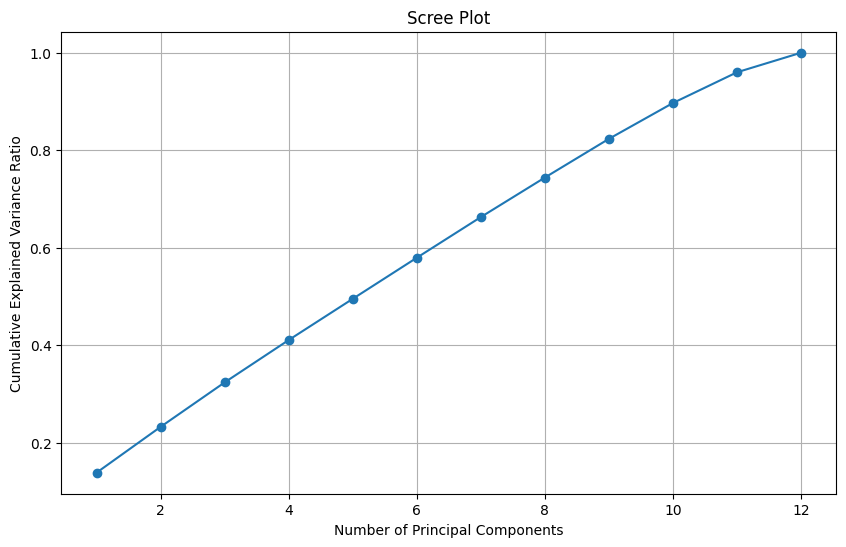

In [80]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [81]:
pca = PCA(n_components=8)  # Select 8 principal components

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [82]:
X_train_pca.shape, X_test_pca.shape

((7000, 8), (3000, 8))

In [83]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data using X_train_pca
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_pca, y_train)
    y_train_pred = algorithm.predict(X_train_pca)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a DataFrame for the training data results
df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.795857,0.751912,0.795857,0.731233,2.096995
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.159836
2,KNeighborsClassifier,0.853571,0.844049,0.853571,0.837205,0.659365
3,GaussianNB,0.794857,0.748348,0.794857,0.727617,0.014558
4,AdaBoostClassifier,0.803000,0.779512,0.803000,0.739493,0.731926
5,GradientBoostingClassifier,0.845714,0.840501,0.845714,0.819593,3.220893
6,RandomForestClassifier,0.999857,0.999857,0.999857,0.999857,2.989187
7,XGBClassifier,0.976000,0.976450,0.976000,0.975507,0.578997
8,SVC,0.826571,0.827918,0.826571,0.781860,2.702180


In [84]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data using X_test_pca
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a DataFrame for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.811667,0.775604,0.811667,0.753388
1,DecisionTreeClassifier,0.755000,0.764008,0.755000,0.759238
2,KNeighborsClassifier,0.809333,0.779078,0.809333,0.784247
3,GaussianNB,0.810333,0.773732,0.810333,0.746123
4,AdaBoostClassifier,0.815000,0.786824,0.815000,0.757753
5,GradientBoostingClassifier,0.837333,0.820099,0.837333,0.809034
6,RandomForestClassifier,0.837667,0.820170,0.837667,0.810530
7,XGBClassifier,0.829000,0.809284,0.829000,0.812211
8,SVC,0.829000,0.816536,0.829000,0.784286


# `Final Model: XGBoost Using 9 variables`

In [85]:
x = df_cleaned.drop("Exited",axis=1)
y = df_cleaned['Exited']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [87]:
X_train.shape, X_test.shape

((7000, 12), (3000, 12))

In [88]:
X_train.columns

Index(['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [89]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical columns to scale
columns_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = MinMaxScaler()

# Convert columns to float64 before applying MinMaxScaler
X_train[columns_to_scale] = X_train[columns_to_scale].astype(float)
X_test[columns_to_scale] = X_test[columns_to_scale].astype(float)

# Apply MinMax scaling safely
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [90]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    random_state=42               # Random seed for reproducibility
)

# Train (fit) the model
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [91]:
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate metrics for train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

results

,Metric,Train,Test
0,Accuracy,0.972714,0.863333
1,Precision,0.985385,0.707143
2,Recall,0.881624,0.508562
3,F1-Score,0.930621,0.591633


# `Hyperparameter Tunning`

Hyperparameters are settings in machine learning algorithms that control how the algorithm works. They are like the knobs and dials on a machine, and they can be adjusted to improve the performance of the algorithm.

In [92]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

In [93]:
# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='recall',
    cv=5
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='recall')

In [94]:
# Get the best model from the search
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_xgb.predict(X_test)

# Calculate recall for the test set
test_recall = recall_score(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Recall with Best Model:", test_recall)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Test Recall with Best Model: 0.4845890410958904


# `Cross Validation`

* Cross-validation is a technique used to evaluate the performance of a machine learning model. It works by dividing the data into several parts, called folds. The model is then trained on a subset of the data and tested on the remaining folds. This process is repeated several times, and the results are averaged to get an estimate of the model's performance.


* Cross-validation is necessary because it helps us avoid overfitting the model to the training data.


* Cross-validation is a way to make sure that our model is not just memorizing the training data, but that it is actually learning to make accurate predictions on new data.

In [95]:
#cross validation of accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.84142857 0.85285714 0.85       0.84214286 0.845     ]

Mean Accuracy Score: 0.8462857142857143


In [96]:
#cross validation of recall

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.45704467 0.50171821 0.51202749 0.5137931  0.43448276]

Mean Recall Score: 0.4838132480151677


# `Finding Optimal Threshold`

In [97]:
#creating a dataframe of probabilites, actual labels, predicted labels for genral check

probabilities = xgb_classifier.predict_proba(X_train)

predicted_labels = xgb_classifier.predict(X_train)

results = pd.DataFrame({'Probability': probabilities[:, 1],
                        'Actual_Label': y_train,
                        'Predicted_Label': predicted_labels})

results.sample(10)

,Probability,Actual_Label,Predicted_Label
5571,0.982072,1,1
9668,0.003462,0,0
8630,0.052935,0,0
4732,0.952047,1,1
297,0.994189,1,1
9183,0.142544,0,0
7914,0.003696,0,0
3788,0.030180,0,0
1554,0.006950,0,0
3417,0.187788,0,0


In [98]:
#check evaulation metrics for different thresholds

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Creating an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterating over the probability thresholds
for threshold in thresholds:
    # Converting probabilities to predicted labels based on the threshold
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_train, predicted_labels)
    precision = precision_score(y_train, predicted_labels, zero_division=1)
    recall = recall_score(y_train, predicted_labels, zero_division=1)
    f1 = f1_score(y_train, predicted_labels, zero_division=1)

    # Adding the metrics to the DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)
metrics_df

<ipython-input-98-59949daac9c7>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],


,Probability,Accuracy,Precision,Recall,F1 Score
0,0.1,0.847429,0.576541,0.997935,0.730847
1,0.2,0.942286,0.787083,0.989677,0.876829
2,0.3,0.971429,0.901860,0.967653,0.933599
3,0.4,0.978286,0.958421,0.935994,0.947075
4,0.5,0.972714,0.985385,0.881624,0.930621
5,0.6,0.956429,0.993976,0.794907,0.883365
6,0.7,0.932143,0.997963,0.674467,0.804928
7,0.8,0.896857,1.000000,0.503097,0.669414
8,0.9,0.861571,1.000000,0.333104,0.499742
9,1.0,0.792429,1.000000,0.000000,0.000000


## `Check the Trade-Off Between Accuracy, Sensitivity, Specitivity, F-1 Score and Probabilities (Thresholds)`

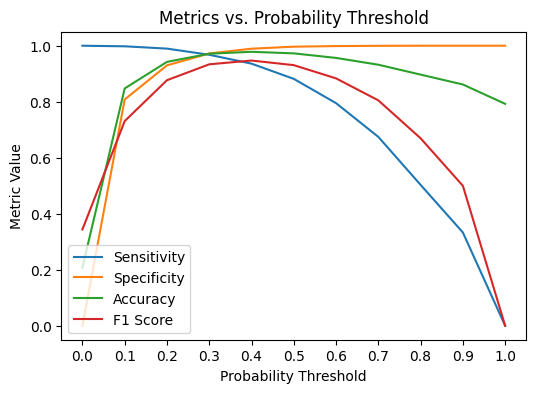

In [99]:
from sklearn.metrics import confusion_matrix

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train, train_predictions))

# Plot the sensitivity, specificity, accuracy, and F1 score against probability thresholds
plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()

# `Model Evaulation (XG Boost)`

## `Train & Test Data Metrics`

In [100]:
# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,Accuracy,Precision,Recall,F1-score
0,Train,0.972714,0.977605,0.939099,0.956819
1,Test,0.863333,0.797951,0.728826,0.754784


## `Confusion Matrix`

Confusion matrix is a table that is used to evaluate the performance of a machine learning model. It shows how many instances were correctly classified as positive (true positives), incorrectly classified as positive (false positives), correctly classified as negative (true negatives), and incorrectly classified as negative (false negatives).

In [101]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (xgb_classifier.predict_proba(X_train)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (xgb_classifier.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),78.971429,76.433333
True Negative (%),0.271429,4.100000
False Positive (%),2.457143,9.566667
False Negative (%),18.300000,9.900000


## `ROC-AUC Curve`

ROC-AUC curve, or Receiver Operating Characteristic-Area Under Curve, is a graph used in machine learning to measure the performance of a binary classifier. It plots the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds.

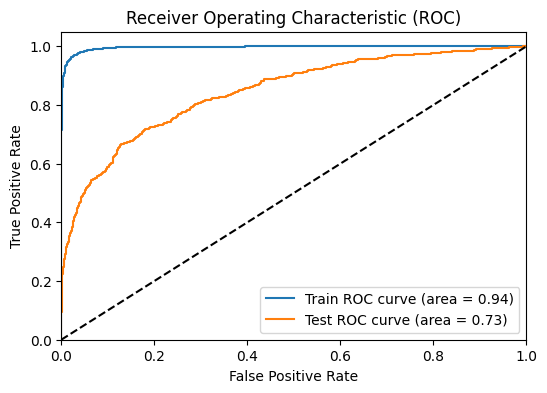

In [102]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = xgb_classifier.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# `Important Features in Model Building`

In [103]:
feature_importance_df

,Feature,Importance
0,Age,0.221080
1,NumOfProducts,0.126334
2,Balance,0.120910
3,EstimatedSalary,0.119164
4,RowNumber,0.117626
5,CreditScore,0.115757
6,Tenure,0.067765
7,IsActiveMember,0.039645
8,Geography_Germany,0.025590
9,Gender_Male,0.017060


# `Save model in a pickle file`

In [104]:
import joblib


joblib.dump(xgb_classifier, 'customer_churn_classifier.pkl')

['customer_churn_classifier.pkl']

# `Outcome`

**The outcome of this customer churn prediction project involves developing a machine learning model to predict whether customers are likely to churn. This prediction is based on various customer attributes such as age, credit score, tenure, balance, number of products, credit card ownership, activity status, and estimated salary.**

**The model's primary purpose is to assist in identifying customers who are at a higher risk of churning, enabling the business to take proactive measures to retain them. By leveraging the trained model, the company can allocate resources more effectively, personalize engagement strategies, and implement targeted retention efforts.**

**Ultimately, the project's success is measured by the model's predictive accuracy, helping the company reduce churn rates, improve customer satisfaction, and optimize its customer retention strategies.**